<h1 style='background:#418E32; border:1; color:#F0FFFF; text-align:center; font-size:32px;  padding:6px;'><left>Customer Segmentation with Clustering Model</left></h1>

**Created By**: Wuttipat S. <br>
**Created Date**: 2024-05-19 <br>
**Status**: <span style="color:green">Completed</span>

 <h3 style='background:green; color:#F0FFFF; text-align:center'><left>If you found my notebook helpful or informative, please consider upvoting it to show your support 👍</left></h3>

# Index
---
Customer Personality Analysis is an in-depth examination of a business's target consumers. It enables a company to gain a deeper understanding of its customers, facilitating the tailoring of products to meet the distinct needs, behaviors, and concerns of various customer groups.

This analysis allows a business to fine-tune its products for specific customer segments. For instance, rather than marketing a new product to every customer in their database, a company can identify which segment is most likely to purchase the product and focus its marketing efforts solely on that group.

# Dataset Content
---


### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted 1st campaign offer, 0 otherwise
- AcceptedCmp2: 1 if customer accepted 2nd campaign offer, 0 otherwise
- AcceptedCmp3: 1 if customer accepted 3rd campaign offer, 0 otherwise
- AcceptedCmp4: 1 if customer accepted 4th campaign offer, 0 otherwise
- AcceptedCmp5: 1 if customer accepted 5th campaign offer, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [2]:
'''
Vertify what environment are running
'''
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    path='/kaggle/input/customer-personality-analysis' 
else:
    path="{}".format(os.getcwd())

# Import Libraries <span style=' border:1; color:#95E885; text-align:left; font-size:42px;  padding:6px;'>|</span>

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



# Import Dataset <span style=' border:1; color:#95E885; text-align:left; font-size:42px;  padding:6px;'>|</span>

In [4]:
# Import dataset
data = pd.read_csv(f"{path}/marketing_campaign.csv", sep='\t')
display(data.info())

display(data.describe())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

None

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


> The data contains 29 variables and 2240 observations.

# Data Cleaning <span style=' border:1; color:#95E885; text-align:left; font-size:42px;  padding:6px;'>|</span>
---

- Drop unuse columns
- Validate columns datatype
- Remove missing values
- Remove outliers

### Drop **unuse** columns

- **ID**: Remove because it's a unique identifier per customer, which doesn't contribute to predictive modeling and only serves to identify records.

- **Z_CostContact and Z_Revenue**: Remove because they have constant values across all data, providing no variability or useful information for analysis.


In [5]:
# Drop unnecessary columns 
data1 = data.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1)

### Validate columns **datatype**


- This table provides a structured overview to ensure that each feature is treated with the correct data type, facilitating more effective data handling and analysis.

| Feature Name           | Correct Data Type |
|------------------------|-------------------|
| Year_Birth             | int               |
| Education              | category          |
| Marital_Status         | category          |
| Income                 | float             |
| Kidhome                | int               |
| Teenhome               | int               |
| Dt_Customer            | datetime          |
| Recency                | int               |
| MntWines               | int               |
| MntFruits              | int               |
| MntMeatProducts        | int               |
| MntFishProducts        | int               |
| MntSweetProducts       | int               |
| MntGoldProds           | int               |
| NumDealsPurchases      | int               |
| NumWebPurchases        | int               |
| NumCatalogPurchases    | int               |
| NumStorePurchases      | int               |
| NumWebVisitsMonth      | int               |
| AcceptedCmp3           | bool              |
| AcceptedCmp4           | bool              |
| AcceptedCmp5           | bool              |
| AcceptedCmp1           | bool              |
| AcceptedCmp2           | bool              |
| Complain               | bool              |
| Response               | bool              |


In [6]:
'''
Validate Columns Datatype
'''

# List of categorical columns
categorical_cols = ['Education', 'Marital_Status']

# List of boolean columns
boolean_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                'AcceptedCmp4','AcceptedCmp5', 'Complain', 'Response']

# List of numerical columns
numerical_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 
                  'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                  'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                  'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                  'NumWebVisitsMonth']

# Convert categorical columns to 'category' datatype
for col in categorical_cols:
    data1[col] = data1[col].astype('category')

# Convert boolean columns to 'boolean' datatype
for col in boolean_cols:
    data1[col] = data1[col].astype('boolean')

# Convert 'Dt_Customer' to datetime
data1['Dt_Customer'] = pd.to_datetime(data1['Dt_Customer'], format='%d-%m-%Y')



# Compare datatypes of the original and new DataFrames
compare_dtypes = pd.DataFrame({
    'Original DataType': data.dtypes,
    'New DataType': data1.dtypes
})

compare_dtypes

,Original DataType,New DataType
AcceptedCmp1,int64,boolean
AcceptedCmp2,int64,boolean
AcceptedCmp3,int64,boolean
AcceptedCmp4,int64,boolean
AcceptedCmp5,int64,boolean
Complain,int64,boolean
Dt_Customer,object,datetime64[ns]
Education,object,category
ID,int64,NaN
Income,float64,float64


### Remove **missing values**

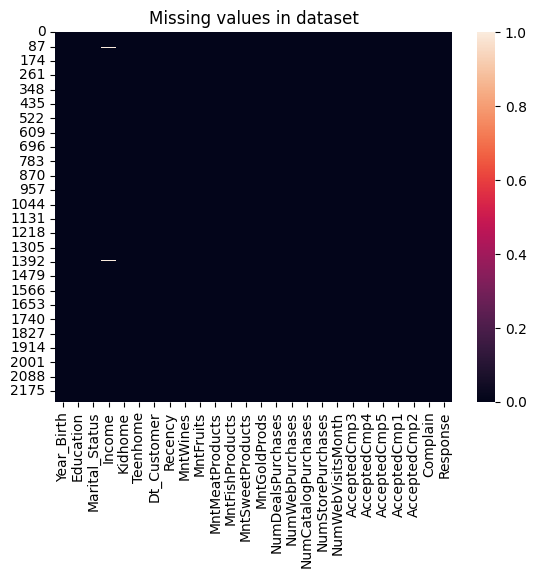

In [7]:
# Display missing values in a dataset
sns.heatmap(data1.isna())
plt.title('Missing values in dataset')
plt.show()

> The 'Income' feature contains missing values that will be removed.

In [8]:
# Removeing missing values
data2 = data1.dropna(axis=0, how='any')

# Creating dataframe comapring before and after process
compare_missing_values = pd.DataFrame({'Original': data1.isna().sum(),
                                       'After': data2.isna().sum()})

print("Number of missing values: ")
display(compare_missing_values)

Number of missing values: 


,Original,After
Year_Birth,0,0
Education,0,0
Marital_Status,0,0
Income,24,0
Kidhome,0,0
Teenhome,0,0
Dt_Customer,0,0
Recency,0,0
MntWines,0,0
MntFruits,0,0


> The 24 missing value in **'Income'** variable have been removed.

### Remove **outliers**

    - I apply standardize to all numerical columns before plot, so we can detect an outlier easier.

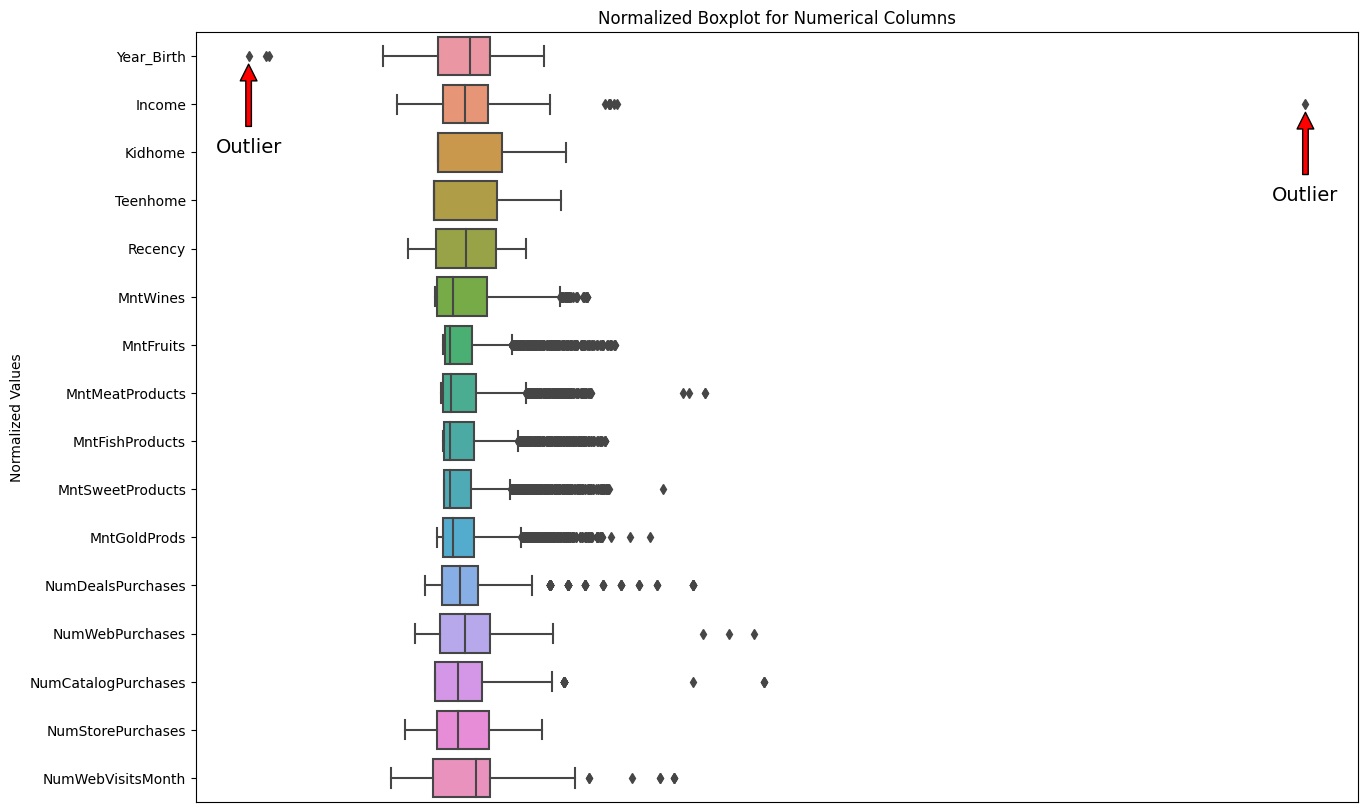

In [9]:
# Normalizing the numerical columns
normalized_data = (data2[numerical_cols] - data2[numerical_cols].mean()) / data2[numerical_cols].std()

# Identify the most left outlier in 'Year_Birth'
year_birth_min_outlier = normalized_data['Year_Birth'].idxmin()

# Identify the most right outlier in 'Income'
income_max_outlier = normalized_data['Income'].idxmax()

# Plotting the boxplot
plt.figure(figsize=(15, 10))
sns_boxplot = sns.boxplot(data=normalized_data, orient='h')
plt.title("Normalized Boxplot for Numerical Columns")
plt.xticks(rotation=45)
plt.ylabel("Normalized Values")

# Annotating the most left outlier for 'Year_Birth'
plt.annotate('Outlier',
             xy=(normalized_data['Year_Birth'][year_birth_min_outlier], numerical_cols.index('Year_Birth')),
             xytext=(normalized_data['Year_Birth'][year_birth_min_outlier] + 0, numerical_cols.index('Year_Birth') + 2),
             arrowprops=dict(facecolor='red', shrink=0.1),
             fontsize=14, ha='center')

# Annotating the most right outlier for 'Income'
plt.annotate('Outlier',
             xy=(normalized_data['Income'][income_max_outlier], numerical_cols.index('Income')),
             xytext=(normalized_data['Income'][income_max_outlier] + 0, numerical_cols.index('Income') + 2),
             arrowprops=dict(facecolor='red', shrink=0.1),
             fontsize=14, ha='center')

# Turning off the x-axis ticks
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


plt.show()


> As notice that there are two group of extreme outlier in 'Year_Birth' and 'Income'. Let focus only two variables.

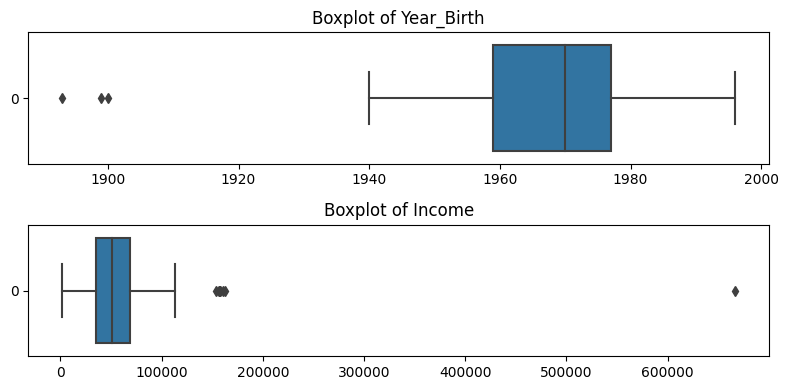

In [10]:
# Setting up the subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 4))

# Plotting 'Year_Birth' on the first subplot
sns.boxplot(data=data2['Year_Birth'], orient='h', ax=axs[0])
axs[0].set_title('Boxplot of Year_Birth')

# Plotting 'Income' on the second subplot
sns.boxplot(data=data2['Income'], orient='h', ax=axs[1])
axs[1].set_title('Boxplot of Income')

plt.tight_layout()
plt.show()

>- The boxplot reveals outliers with birth years before 1900, indicating these are either significantly older individuals or deceased.
>- Similarly, the income data shows one extremely individual outlier with an income around $600,000. This could indicate a data entry error, an anomaly, or a genuinely high-income individual.
>- These outliers will be remove.

In [11]:
# Removing outliers
year_outlier = (data2['Year_Birth'] > 1920)
income_outlier = (data2['Income'] < 200000)

data3 = data2[year_outlier & income_outlier]

print(data2[['Year_Birth','Income']].describe())
print("\n===== After removing outliers =====\n")
print(data3[['Year_Birth','Income']].describe())

        Year_Birth         Income
count  2216.000000    2216.000000
mean   1968.820397   52247.251354
std      11.985554   25173.076661
min    1893.000000    1730.000000
25%    1959.000000   35303.000000
50%    1970.000000   51381.500000
75%    1977.000000   68522.000000
max    1996.000000  666666.000000

===== After removing outliers =====

        Year_Birth         Income
count  2212.000000    2212.000000
mean   1968.913653   51958.810579
std      11.701599   21527.278844
min    1940.000000    1730.000000
25%    1959.000000   35233.500000
50%    1970.000000   51371.000000
75%    1977.000000   68487.000000
max    1996.000000  162397.000000


> The minimum values in 'Year of Birth' and the maximum values in 'Income' have been removed as outliers.

#### Display data before and after outlier removing

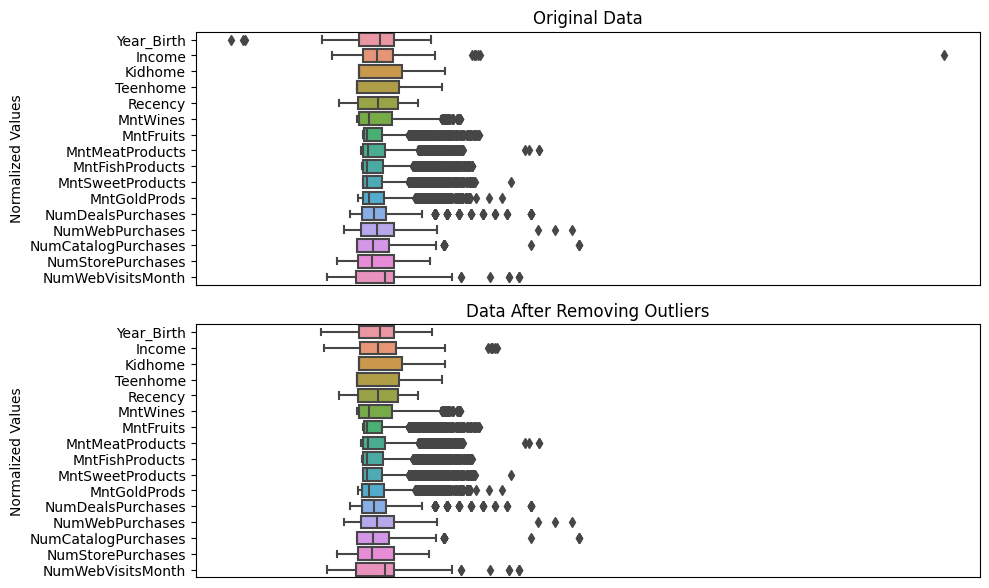

In [12]:
plt.figure(figsize=(10, 6))

# Original Data Plot
plt.subplot(2, 1, 1)
sns.boxplot(data=normalized_data, orient='h')
plt.title("Original Data")
plt.xticks(rotation=45)
plt.ylabel("Normalized Values")
plt.xlabel("")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Turn off x-axis ticks


# Normalizing the filtered data
normalized_data_filtered = (data3[numerical_cols] - data3[numerical_cols].mean()) / data3[numerical_cols].std()


# Filtered Data Plot
plt.subplot(2, 1, 2, sharex=plt.gca())
sns.boxplot(data=normalized_data_filtered, orient='h')
plt.title("Data After Removing Outliers")
plt.xticks(rotation=45)
plt.ylabel("Normalized Values")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Turn off x-axis ticks



plt.tight_layout()
plt.show()


#### Display data before and after outlier removing

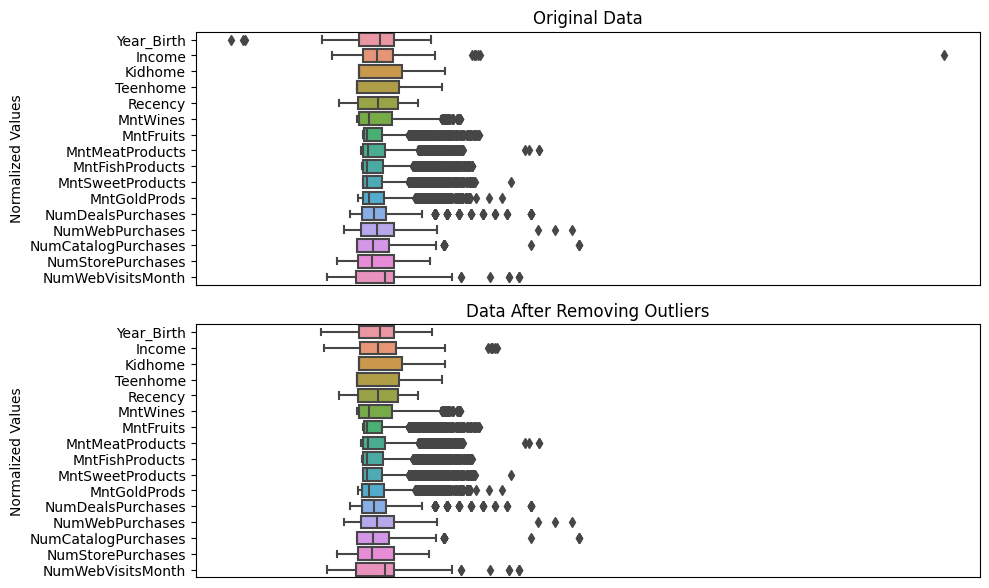

In [13]:
plt.figure(figsize=(10, 6))

# Original Data Plot
plt.subplot(2, 1, 1)
sns.boxplot(data=normalized_data, orient='h')
plt.title("Original Data")
plt.xticks(rotation=45)
plt.ylabel("Normalized Values")
plt.xlabel("")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Turn off x-axis ticks


# Filtered Data Plot
plt.subplot(2, 1, 2, sharex=plt.gca())
sns.boxplot(data=normalized_data_filtered, orient='h')
plt.title("Data After Removing Outliers")
plt.xticks(rotation=45)
plt.ylabel("Normalized Values")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)  # Turn off x-axis ticks



plt.tight_layout()
plt.show()


> Now the data is cleaned and ready to perform a futher analysis tasks. Next step is **'Feature Engineering'**.
---


# Feature Engineering <span style=' border:1; color:#95E885; text-align:left; font-size:42px;  padding:6px;'>|</span>
---

Create new features to improve analysis aspect and model efficiency.
- Age: Age of customer.
- Year_Membership: Preriod of membership.
- Adult_home: Number of adults living in a house.
- Family_Size: Total number of people live in a house.
- Income_Segment: Income segments based on qauntiles.
- Total_Spend: Total spending based on sum of amount spending on each product.

In [14]:
data4 = data3.copy()

In [15]:
# Age I setting age as time that the dataset was public (2021)
data4['Age'] = 2021 - data4['Year_Birth']

data4[['Year_Birth', 'Age']].head()

,Year_Birth,Age
0,1957,64
1,1954,67
2,1965,56
3,1984,37
4,1981,40


In [16]:
# Year_Membership
data4['Year_Membership'] = 2021 - data4['Dt_Customer'].dt.year
data4[['Dt_Customer', 'Year_Membership']].head()

,Dt_Customer,Year_Membership
0,2012-09-04,9
1,2014-03-08,7
2,2013-08-21,8
3,2014-02-10,7
4,2014-01-19,7


In [17]:
# Adult_home
mapping = {
    'Single': 1,
    'Together': 2,
    'Married': 2,
    'Divorced': 1,
    'Widow': 1,
    'Alone': 1,
    'Absurd': 1,
    'YOLO': 1}
data4['Adulthome'] = data4['Marital_Status'].map(mapping)

data4[['Marital_Status', 'Adulthome']].head(5)

,Marital_Status,Adulthome
0,Single,1
1,Single,1
2,Together,2
3,Together,2
4,Married,2


In [18]:
# Family_Size
data4['Family_Size'] = data4[['Kidhome', 'Teenhome', 'Adulthome']].sum(axis=1)
data4[['Kidhome', 'Teenhome', 'Adulthome', 'Family_Size']].head()

,Kidhome,Teenhome,Adulthome,Family_Size
0,0,0,1,1
1,1,1,1,3
2,0,0,2,2
3,1,0,2,3
4,1,0,2,3


In [19]:
# Income_Segment
data4['Income_Segment'] = pd.qcut(data4['Income'], 4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

print(data4['Income'].describe()) #reference
data4[['Income', 'Income_Segment']].head()

count      2212.000000
mean      51958.810579
std       21527.278844
min        1730.000000
25%       35233.500000
50%       51371.000000
75%       68487.000000
max      162397.000000
Name: Income, dtype: float64


,Income,Income_Segment
0,58138.0,Mid-High
1,46344.0,Mid-Low
2,71613.0,High
3,26646.0,Low
4,58293.0,Mid-High


In [20]:
data4

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Year_Membership,Adulthome,Family_Size,Income_Segment
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,False,False,False,False,False,False,True,64,9,1,1,Mid-High
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,False,False,False,False,False,False,False,67,7,1,3,Mid-Low
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,False,False,False,False,False,False,False,56,8,2,2,High
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,False,False,False,False,False,False,False,37,7,2,3,Low
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,False,False,False,False,False,False,False,40,7,2,3,Mid-High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,False,False,False,False,False,False,False,54,8,2,3,Mid-High
2236,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,False,False,False,True,False,False,False,75,7,2,5,Mid-High
2237,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,False,True,False,False,False,False,False,40,7,1,1,Mid-High
2238,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,False,False,False,False,False,False,False,65,7,2,3,High


>The 'Income_Segment' is defined by ranges between the quartiles of the 'Income' column as follows:
>
> - 0 to 35,233 = 'Low'
> - 35,233 to 51,371 = 'Mid-Low'
> - 51,372 to 68,487 = 'Mid-High'
> - 68,488 and above = 'High'

In [21]:
# Total_Spend
data4['Total_Spend'] = data4[['MntWines', 'MntFruits', 'MntMeatProducts',
                              'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
data4[['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Total_Spend']].head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Spend
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27
2,426,49,127,111,21,42,776
3,11,4,20,10,3,5,53
4,173,43,118,46,27,15,422


In [22]:
#dataset after feature engineering
data4.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Year_Membership,Adulthome,Family_Size,Income_Segment,Total_Spend
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,False,False,False,False,False,False,True,64,9,1,1,Mid-High,1617
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,False,False,False,False,False,False,False,67,7,1,3,Mid-Low,27
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,False,False,False,False,False,False,False,56,8,2,2,High,776
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,False,False,False,False,False,False,False,37,7,2,3,Low,53
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,False,False,False,False,False,False,False,40,7,2,3,Mid-High,422


> Our dataset are ready to analyse. Let start **'Exploratory Data Analysis'** process.


# After Cleaning Summary <span style=' border:1; color:#95E885; text-align:left; font-size:42px;  padding:6px;'>|</span>

In [23]:
print(data4.info())
display(data4.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2212 non-null   int64         
 1   Education            2212 non-null   category      
 2   Marital_Status       2212 non-null   category      
 3   Income               2212 non-null   float64       
 4   Kidhome              2212 non-null   int64         
 5   Teenhome             2212 non-null   int64         
 6   Dt_Customer          2212 non-null   datetime64[ns]
 7   Recency              2212 non-null   int64         
 8   MntWines             2212 non-null   int64         
 9   MntFruits            2212 non-null   int64         
 10  MntMeatProducts      2212 non-null   int64         
 11  MntFishProducts      2212 non-null   int64         
 12  MntSweetProducts     2212 non-null   int64         
 13  MntGoldProds         2212 non-null   i

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Year_Membership,Adulthome,Family_Size,Total_Spend
count,2212.000000,2212.000000,2212.000000,2212.000000,2212,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,1968.913653,51958.810579,0.441682,0.505877,2013-07-10 06:51:25.714285824,49.019439,305.287523,26.329566,167.029837,37.648734,27.046564,43.925859,2.324593,4.088156,2.672242,5.806510,5.321429,52.086347,7.971971,1.645570,2.593128,607.268083
min,1940.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,7.000000,1.000000,1.000000,5.000000
25%,1959.000000,35233.500000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,44.000000,8.000000,1.000000,2.000000,69.000000
50%,1970.000000,51371.000000,0.000000,0.000000,2013-07-08 00:00:00,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,51.000000,8.000000,2.000000,3.000000,397.000000
75%,1977.000000,68487.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,62.000000,8.000000,2.000000,3.000000,1048.000000
max,1996.000000,162397.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,81.000000,9.000000,2.000000,5.000000,2525.000000
std,11.701599,21527.278844,0.536955,0.544253,NaN,28.943121,337.322940,39.744052,224.254493,54.772033,41.090991,51.706981,1.924507,2.742187,2.927542,3.250939,2.425597,11.701599,0.685926,0.478449,0.906236,602.513364


> 
> 1. **Age**: Born around 1940-1996, making them approximately 25-81 years old as of the current year (assume it 2021).
> 2. **Income**: Has an average annual income of around 51,000 - 52,000.
> 
> 3. **Family Composition**: Likely to have a small family, with a mean of 0.44 kids and 0.51 teenagers at home. This suggests that they might have one child or teenager living with them, or possibly a mix of both. The average family size, including adults and children, is around 2.6.
> 
> 4. **Purchasing Habits**: Tends to spend more on wines, with a mean expenditure of around 305 in this category. Also spends on meats, fruits, fish, sweet products, and gold, but to a lesser extent.
> 
> 5. **Shopping Behavior**: Makes an average of 2.32 deals purchases, 4.09 web purchases, 2.67 catalog purchases, and 5.81 store purchases. Visits the web (presumably the store's website or related online platforms) around 5.32 times a month.
> 
> 6. **Engagement with Marketing Campaigns**: Generally has low engagement with marketing campaigns, as indicated by the low mean values for accepted campaigns.
> 
> 7. **Membership Duration**: The majority of customers have been members of the service or loyalty program for approximately 7-8 years, demonstrating sustained loyalty and engagement with the brand. It is unusual that there are no newer members, suggesting that the company may not have accepted new registrations for the past 7 years.
> 
> 8. **Complaints**: Unlikely to have made complaints, as suggested by the low mean value in the 'Complain' category.
> <br>
>
> Our dataset are ready to analyse. Let start **'Exploratory Data Analysis'** process.

# Exploratory Data Analysis <span style=' border:1; color:#95E885; text-align:left; font-size:42px;  padding:6px;'>|</span>
---

1. **Distribution Analysis**: Analyze the distribution of key numerical variables.
1. **Categorical Analysis**: Understand the frequency of each category.
1. **Proportion Analysis**: Understand which family sizes and eduacation level are more prevalent in each income segment.
1. **Campaign Responses**: Look at how customers responded to different campaigns.
1. **Purchasing Behavior**: Explore across different channels.
1. **Impact of Website**: Examime how website impact customer behavious.
1. **Impact of 'Family Size'**: Explore how family size affects pruchasing, product preferences.
1. **Correlation Analysis**: Discover the relationship between different viriables.
1. **Analyzing Variables Across Segments**: Review how variuos varibles such as purchasing patterns differ across distinct customer segments.

### 1. Distribution Analysis

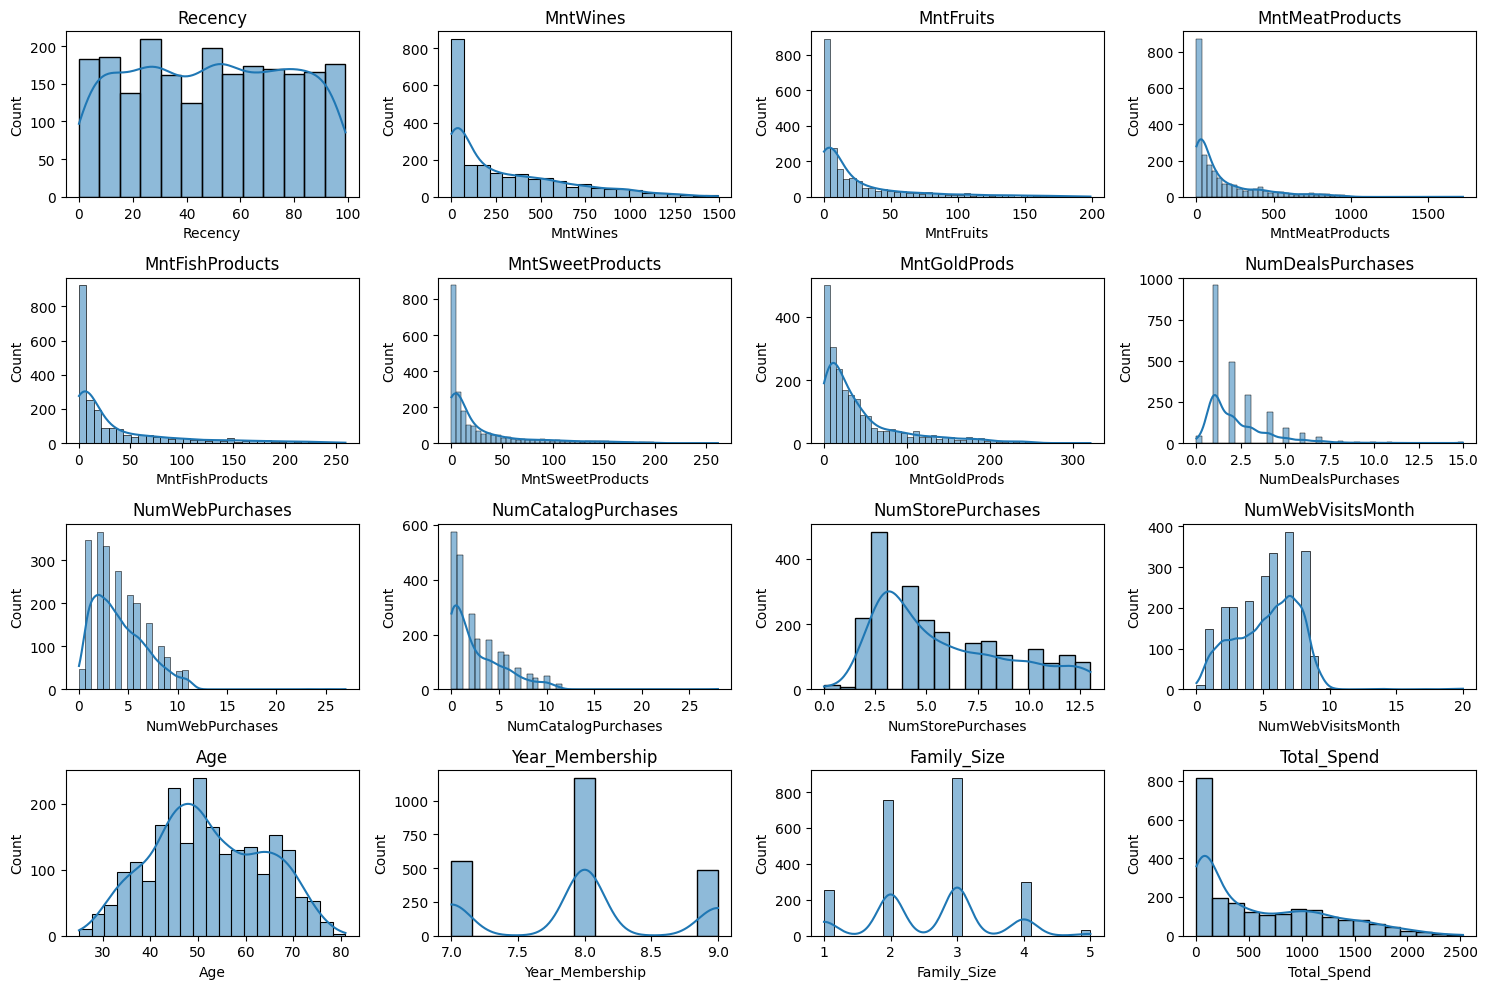

In [24]:
# List of key numerical columns to visualize
numerical_columns = ['Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'Year_Membership', 'Family_Size', 'Total_Spend']

# Setting up the figure for multiple subplots
plt.figure(figsize=(15, 10))

# Plotting histograms for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)  # Adjust the grid dimensions as needed
    sns.histplot(data4[col],bins='auto', kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

> The plots shows a series of histograms, each depicting the distribution of a different variable.
> 
> 1. **Recency**: The distribution appears fairly uniform, suggesting that customers have made purchases throughout the recent period sampled without significant time gaps.
> 
> 2. **MntWines**: Shows a right-skewed distribution with a peak at lower spending amounts, indicating that most customers spend less on wines, but there is a long tail of customers who spend more.
> 
> 3. **MntFruits, MntFishProducts, MntSweetProducts, MntGoldProds**: These are all right-skewed distributions, indicating that most customers spend smaller amounts on these product categories, with fewer customers spending more.
> 
> 4. **MntMeatProducts**: Also right-skewed, with a higher peak, suggesting that while there's a concentration of customers spending less, there's also a substantial number of customers spending a lot on meat products.
> 
> 5. **NumWebPurchases**: The plot shows that a few customers have made 2-5 purchases on the web, with a portion that has never tried purchasing via the website.
>
> 6. **NumCatalogPurchases** The plot shows a right-skewed distribution, indicating that the majority of customers have never tried catalog purchasing. 
>
> 7. **NumStorePurchases** Although the plot shows signs of a right-skewed distribution, store purchases have a slightly gentler slope compared to other purchasing channels. Additionally, there are nearly no customers who have never made a store purchase.
> 
> 6. **NumDealsPurchases**: This histogram displays a high peak at the lower end, indicating that most customers purchase at least one discounted deal. There is a rapid decrease in the number of customers as the count of deal purchases increases.
> 
> 7. **NumWebVisitsMonth**: The distribution has a hign peak between 5-10 times, suggesting that most customers visit the company's website a few times per month.
> 
> 8. **Age**: The distribution of age looks approximately bell-shaped, centered around late middle age, implying a diverse customer base but with a concentration in late-middle-aged customers.
> 
> 9. **Year_Membership**: The data suggests that a significant number of customers have been members for approximately 8 years, with membership durations mostly ranging between 7 to 9 years.
> 
> 10. **Family_Size**: Most customers have a family size of 2 or 3, with single individuals and larger families being less common.
> 
> 11. **Total_Spend**: The distribution is right-skewed, indicating that while most customers have a lower total spend, there's a tail of customers who spend much more, up to 2500 units of currency.
> 

### 2. Categorical Analysis

['Education' 'Marital_Status' 'Income_Segment']


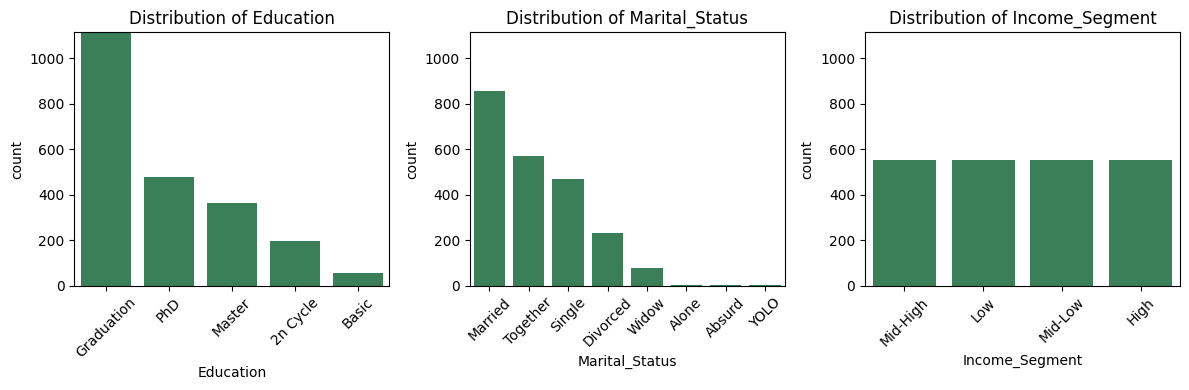

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data4 is your DataFrame
multi_cat_cols = data4.select_dtypes('category').columns
print(multi_cat_cols.values)

# Setting up the figure for multiple subplots with a shared y-axis
plt.figure(figsize=(12, 4))

# Track the maximum count to set a common y-axis range
max_count = 0
for col in multi_cat_cols:
    max_count = max(max_count, data4[col].value_counts().max())

# Plotting bar charts for each categorical column with shared y-axis
for i, col in enumerate(multi_cat_cols, 1):
    plt.subplot(1, 3, i, sharey=ax1 if i > 1 else None)  # Sharing y-axis with the first subplot
    ax1 = sns.countplot(x=data4[col], order=data4[col].value_counts().index, color='seagreen')
    plt.title(f'Distribution of {col}')
    plt.tick_params(axis='x', rotation=45)

    # Set the same y-axis limit for all subplots based on the maximum count found
    plt.ylim(0, max_count)

plt.tight_layout()
plt.show()


['Education' 'Marital_Status' 'Income_Segment']


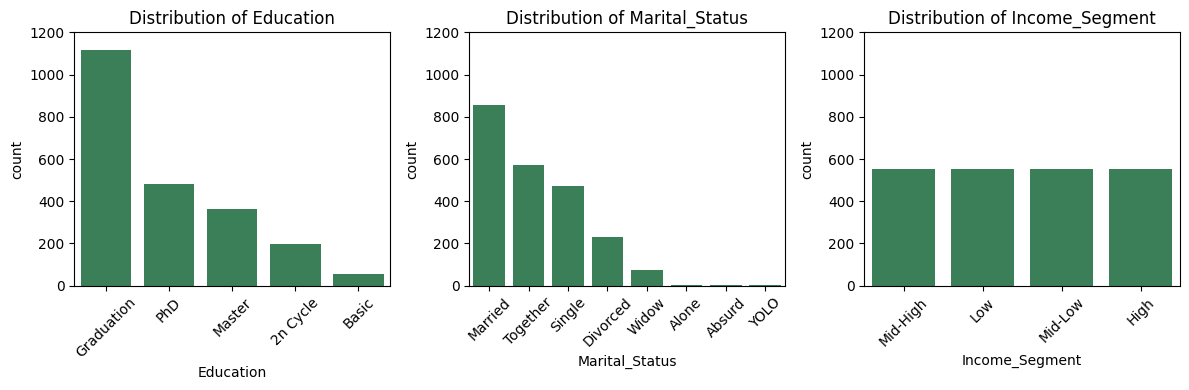

In [26]:
multi_cat_cols = data4.select_dtypes('category').columns
print(multi_cat_cols.values)

# Setting up the figure for multiple subplots
plt.figure(figsize=(12, 4))

# Plotting bar charts for each categorical column
for i, col in enumerate(multi_cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=data4[col], order = data4[col].value_counts().index, color='seagreen')
    plt.title(f'Distribution of {col}')
    plt.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    
    plt.ylim(0, 1200)

plt.show()


> - Higher education levels like "Graduation" and "PhD" dominate.
> - Marital status varies widely, but traditional statuses like "Married", "Together", and "Single" are more common than others.
> - Income distribution across the segments is even, since I divine income by quantile, that mean the income levels will balance distribution.

### 3. Proportion Analysis
- Calculate the proportion of each **'Family size'** within each income segment.
- Calculate the proportion of each **'Education'** within each income segment.

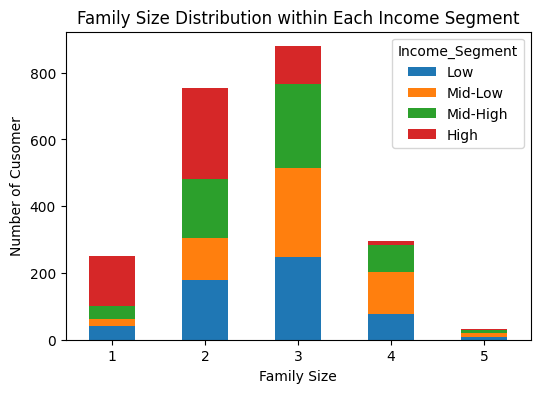

In [27]:
# Crosstabulation between Family_Size and Income_Segment
Family_Size_income_segment_crosstab = pd.crosstab(data4['Family_Size'], data4['Income_Segment'])

# Visualization using a stacked bar chart
Family_Size_income_segment_crosstab.plot(kind='bar', stacked=True, figsize=(6, 4))
plt.title('Family Size Distribution within Each Income Segment')
plt.xlabel('Family Size')
plt.ylabel('Number of Cusomer')
plt.xticks(rotation=0)
plt.show()

> Overall, the chart indicates that as family size increases, the overall number of customers tends to decrease. Interestingly, larger families appear to be poorer compared to smaller families, particularly in higher income brackets.

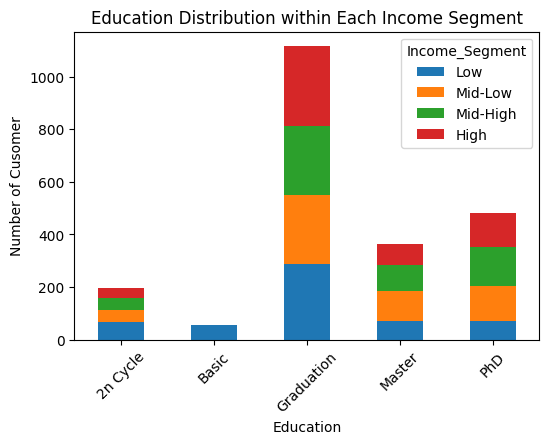

In [28]:
# Crosstabulation between Education and Income_Segment
education_income_segment_crosstab = pd.crosstab(data4['Education'], data4['Income_Segment'])

# Visualization using a stacked bar chart
education_income_segment_crosstab.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title('Education Distribution within Each Income Segment')
plt.xlabel('Education')
plt.ylabel('Number of Cusomer')
plt.xticks(rotation=45)
plt.show()


> - Overall, the chart reveals a clear trend between those with education levels above graduation and those with only basic education. Specifically, basic education is associated solely with the 'Low' income segment. 
> - Conversely, higher education levels, such as a PhD, show no significant difference in income distribution compared to other graduate-level education, such as Master's degrees and Bachelor's degrees.

### 4. Campaign Responses

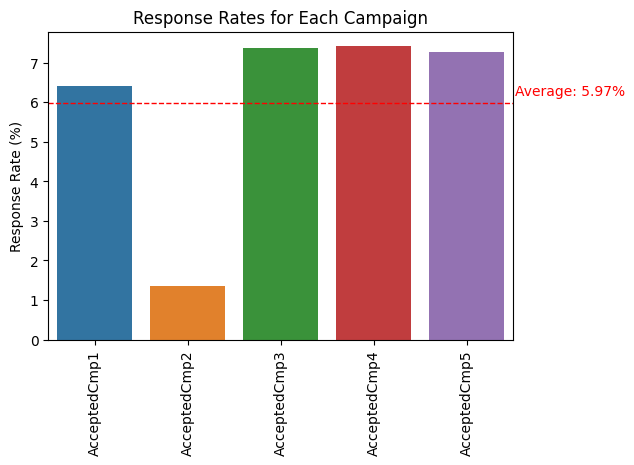

AcceptedCmp1     6.41953
AcceptedCmp2    1.356239
AcceptedCmp3    7.368897
AcceptedCmp4    7.414105
AcceptedCmp5    7.278481
dtype: Float64

In [29]:
# Calculating the overall response rates for each campaign
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_response_rates = data4[campaign_columns].mean() * 100  # Converting to percentages

# Visualization of response rates
plt.figure(figsize=(6, 4))
sns.barplot(x=campaign_response_rates.index, y=campaign_response_rates.values)

# Calculate the average and add a horizontal line
average_response_rate = campaign_response_rates.mean()
plt.axhline(average_response_rate, color='red', linestyle='dashed', linewidth=1)
plt.text(len(campaign_response_rates)+0.7, average_response_rate+0.2, f'Average: {average_response_rate:.2f}%', color='red', ha='right')


plt.title('Response Rates for Each Campaign')
plt.ylabel('Response Rate (%)')
plt.xticks(rotation=90)
plt.show()

campaign_response_rates


> The provided bar chart visualizes the response rates for five different promotional campaigns, with each bar representing the percentage of respondents who accepted the offer in each campaign. 
> 1. Campaigns 3,4  and 5 have the highest response rates, which suggests that the offers or the method of these campaigns were particularly appealing or well-received.
> 1. Campaign 2's strategy was least effective, given its significantly lower response rate compared to the others.
> 1. The response rates for Campaigns 1 are moderately successful, falling slightly from highest of the range.

### 5. Purchasing Behavior
To analyze purchasing behavior across different channels, we will focus on variables such as **NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases**, and **NumDealsPurchases**. These represent purchases made through the company’s website, using a catalogue, directly in stores, and purchases made with a discount, respectively. We can approach this analysis by:

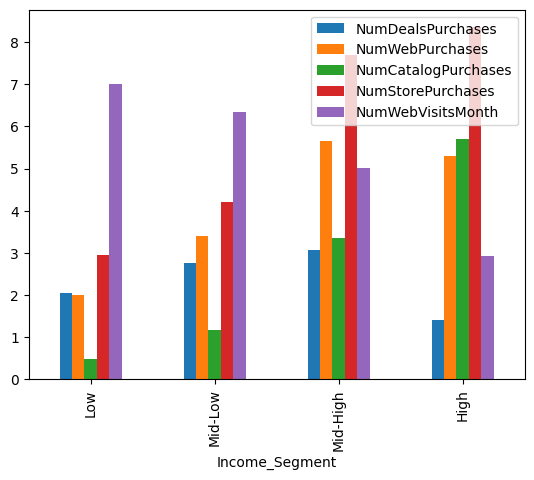

In [30]:
purchases_data = data4.groupby('Income_Segment')[['NumDealsPurchases','NumWebPurchases',
                       'NumCatalogPurchases', 'NumStorePurchases',
                       'NumWebVisitsMonth'
                      ]].mean()

purchases_data.plot(kind='bar')
plt.show()

> The chart you provided shows the purchasing behavior of different income segments across several channels: deals, web, catalog, and store purchases, as well as the number of web visits per month. Let's analyze the trends observed in each income segment:
> 
> 1. **Deal Purchases**: Correlate with income, indicating that wealthier people do not care much about deal purchases.
> 1. **Store Purchases**: Correlate with income levels.
> 1. **Web Purchases**: Show a negative correlation with income.
> 1. **Catalog Purchases**: Correlate with income levels.
> 1. **Web Visits**: Show a negative correlation with income.

### 6. Impact of Website
Next, let's examine the correlation between web visits and web purchases.

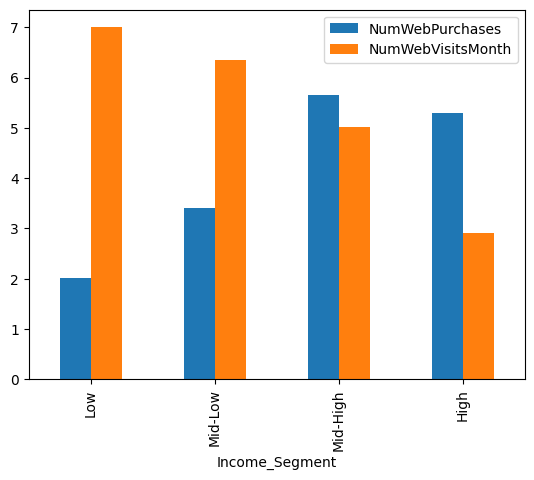

In [31]:
purchases_data = data4.groupby('Income_Segment')[['NumWebPurchases','NumWebVisitsMonth']].mean()

purchases_data.plot(kind='bar')
plt.show()


> From the chart, we can observe the following key trends regarding the number of web visits per month and the average number of web purchases across different income segments:
> - There is a clear negative correlation between income level and the number of web visits; as income increases, the frequency of web visits decreases.
> - Web purchase behavior does not directly correlate with the number of web visits; higher web visits do not necessarily translate to more purchases, especially in lower income segments.
> - High Income Segment experiences a further decrease in web purchases, despite their lower web visit numbers, which might reflect higher quality or more expensive purchases that occur less frequently.
> 

### 7. Impact of 'Family Size'
Finally, let's investigate the impact of family size on spending habits. We'll create a series of boxplots to observe how family size influences spending on different product categories.

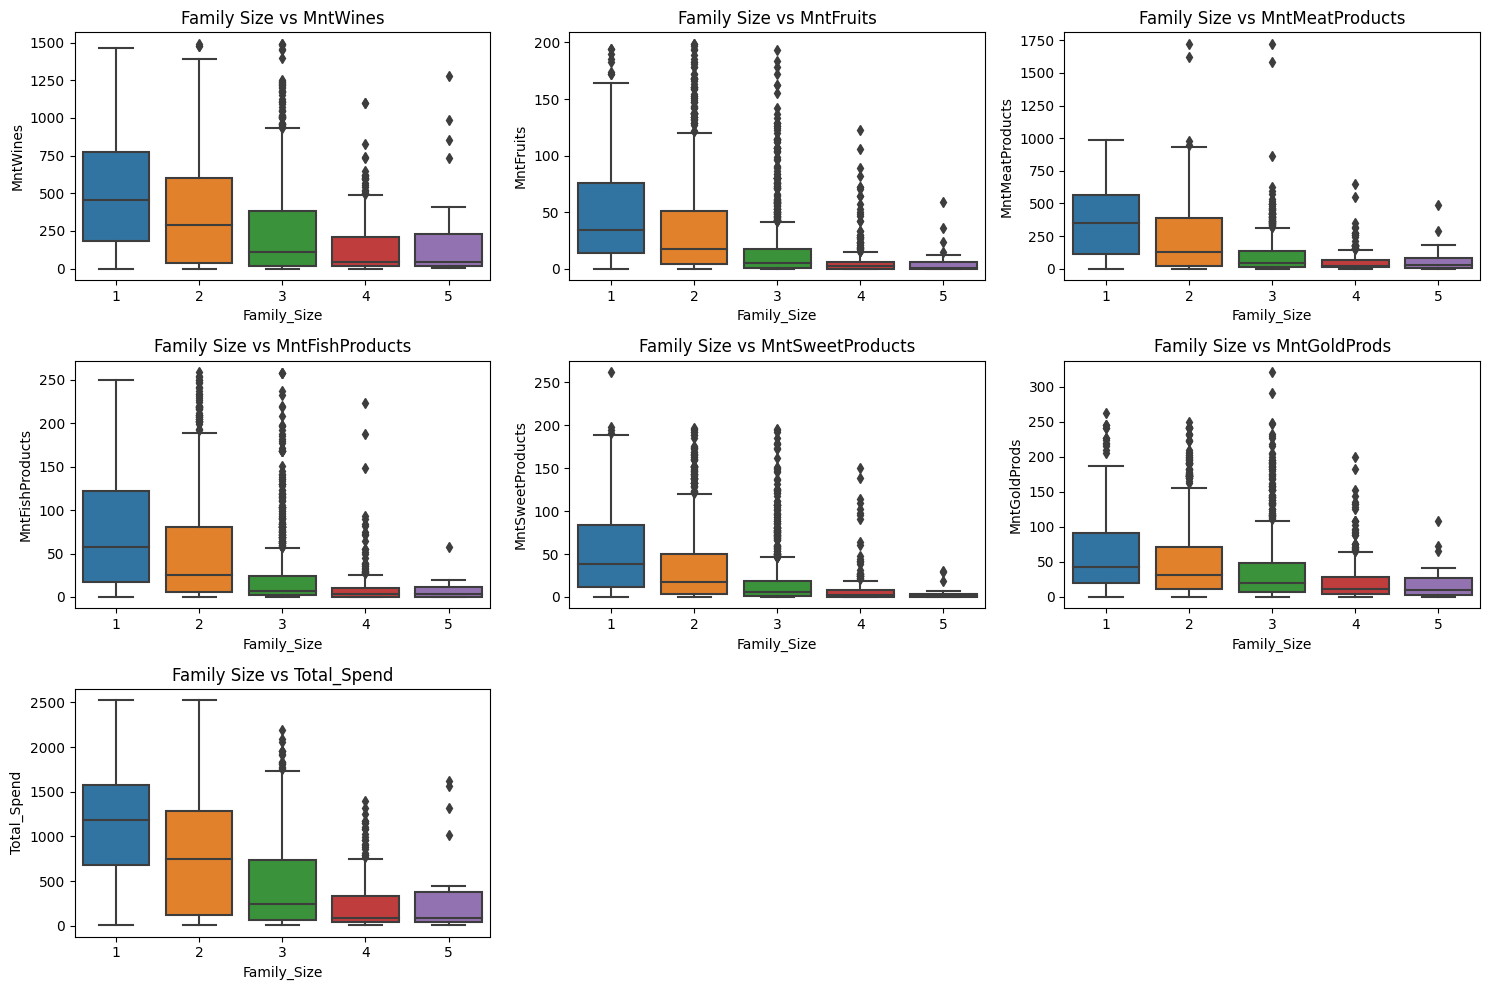

In [32]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProds', 'Total_Spend']

# Impact of Family Size on Spending Habits
plt.figure(figsize=(15, 10))

# Creating boxplots for each spending category against Family Size
for i, col in enumerate(spending_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data4['Family_Size'], y=data4[col])
    plt.title(f'Family Size vs {col}')
    plt.tight_layout()

plt.show()


>The boxplots provide a visual summary of the spending distribution across different family sizes for various product categories:1. Across all product categories, as family size increases, median spending tends to decrease.
>1. Single-person families (family size 1) have the greatest variability in spending, which could be due to more disposable income or fewer family obligations.
>1. Outliers are present in all categories, suggesting that there are exceptions to the general spending patterns within each family size group.
>1. Smaller families have a wider range of spending, which narrows for larger family sizes, possibly indicating budget constraints or different spending priorities.
>
>These insights suggest that **family size does have an influence on spending habits**, with larger families generally spending less on these product categories. This could be due to budget allocation towards other necessities or preferences.

### 8. Correlation Analysis
Let's explore the relationships between different variables in the dataset. We'll focus on:

- Income & Spending
- Webvisit & WebPurchase
- Family Size & Spending

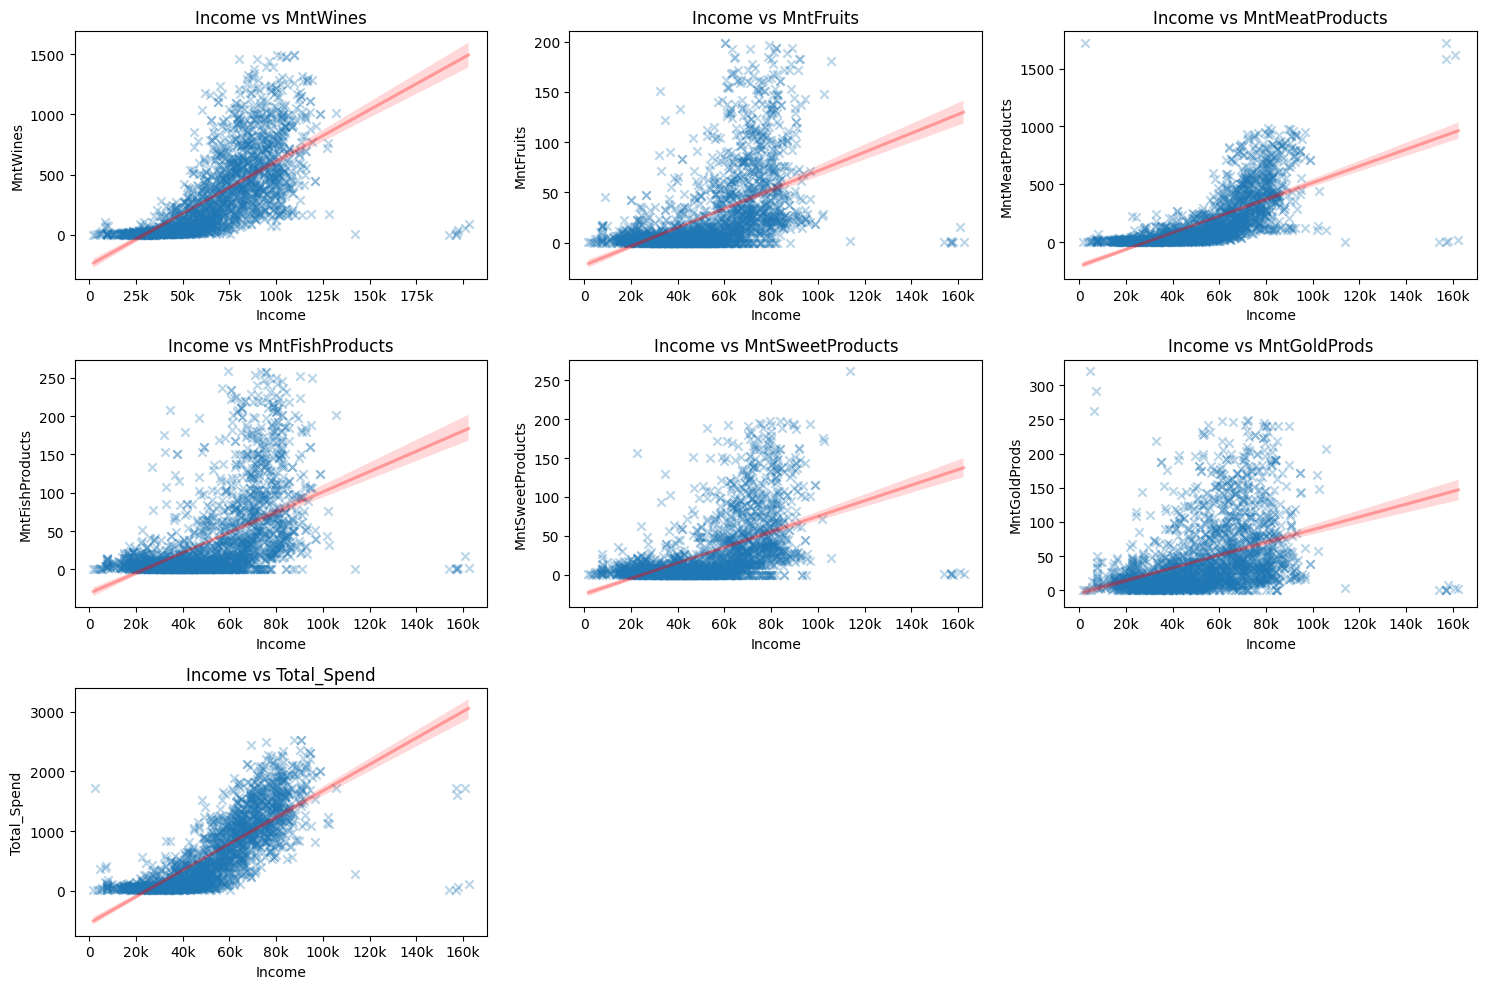

In [33]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProds', 'Total_Spend']

# Function to format the tick labels
def format_tick(value, pos):
    return f'{int(value/1000)}k' if value >= 1000 else str(int(value))

# Setting up the figure for multiple subplots
plt.figure(figsize=(15, 10))

# Creating scatter plots with red regression lines for each spending category against Income
for i, col in enumerate(spending_columns, 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=data4['Income'], y=data4[col], marker='x', scatter_kws={'alpha':0.3}, line_kws={"color": "red", 'alpha':0.3})
    plt.title(f'Income vs {col}')
    
    # Get current axis
    ax = plt.gca()
    
    # Set x-tick labels with the custom formatter
    ax.set_xticklabels([format_tick(x, pos) for x, pos in zip(ax.get_xticks(), range(len(ax.get_xticks())))])

    plt.tight_layout()

plt.show()


> The scatter plots reveal interesting patterns in the relationship between income and spending on various products:
>
> 1. **Income vs MntWines**: There seems to be the strongest positive correlation, suggesting that higher income customers tend to spend more on wines.
> 1. **Income vs MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts**: These categories also show a similar trend, with higher spending observed at higher income levels, although the correlation appears weaker compared to wine.
> 1. **Income vs MntGoldProds**: The pattern is less clear, but there is still an indication that higher income might lead to higher spending on gold products.

### 9. Analyzing Variables Across Segments
We'll then examine key variables across these income segments to observe how spending patterns
For Numerical Variables: We'll use boxplots to compare the distribution of key numerical variables across different income segments. This will help us understand how variables like 'MntWines', 'MntMeatProducts', and others vary with income.


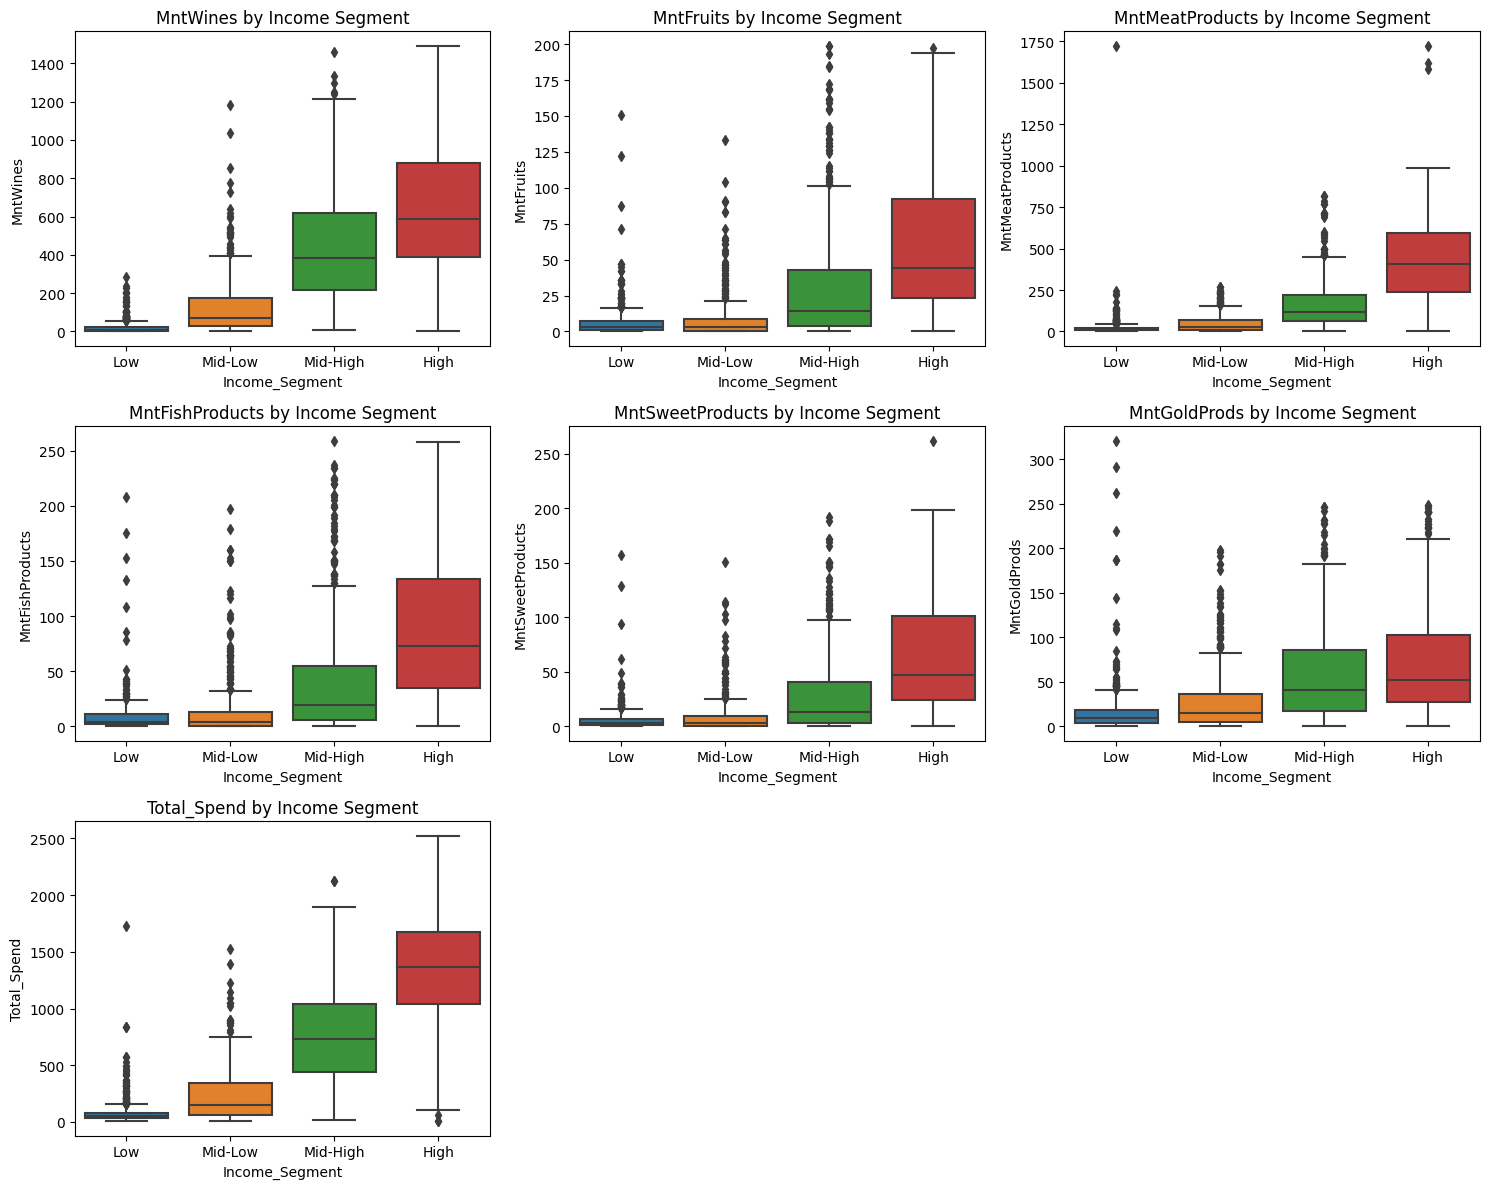

In [34]:
# Visualization for Numerical Variables across Income Segments
numerical_variables_for_visualization = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                                         'MntSweetProducts','MntGoldProds', 'Total_Spend']

# Setting up the figure for multiple subplots
plt.figure(figsize=(15, 12))

# Creating boxplots for each numerical variable
for i, col in enumerate(numerical_variables_for_visualization, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data4['Income_Segment'], y=data4[col])
    plt.title(f'{col} by Income Segment')
    plt.tight_layout()

plt.show()


> The boxplots provide a visual representation of how key numerical variables vary across different income segments:
> 
> 1. The observation ranking by Income more family's imcome is more family spend across products category.
> 1. Wine is the most obious product that we can see the different level of spendign across family weath.
> 1. Gold was the only product that 'Mid-High' and 'Hign' family spend similarly. This can infer..

# Remove Unused columns After Analysed <span style=' border:1; color:#95E885; text-align:left; font-size:42px;  padding:6px;'>|</span>

When preparing data for a customer segmentation analysis using a clustering model, the choice of which columns to drop depends on the relevance of the data to the analysis objectives.

In [35]:
data_new = data4.copy()

# Step 1: Remove unused columns
drop_cols = ['Year_Birth', 'Marital_Status', 'Dt_Customer', 'Kidhome', 'Teenhome', 'Adulthome'
             , 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
data_processed = data_new.drop(columns=drop_cols)

display(data_new.head())
print(data_new.shape)
print("\nAfter remove columns: ")
display(data_processed.head())
print(data_processed.shape)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Year_Membership,Adulthome,Family_Size,Income_Segment,Total_Spend
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,False,False,False,False,False,False,True,64,9,1,1,Mid-High,1617
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,False,False,False,False,False,False,False,67,7,1,3,Mid-Low,27
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,False,False,False,False,False,False,False,56,8,2,2,High,776
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,False,False,False,False,False,False,False,37,7,2,3,Low,53
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,False,False,False,False,False,False,False,40,7,2,3,Mid-High,422


(2212, 32)

After remove columns: 


,Education,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Year_Membership,Family_Size,Income_Segment,Total_Spend
0,Graduation,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,False,True,64,9,1,Mid-High,1617
1,Graduation,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,False,False,67,7,3,Mid-Low,27
2,Graduation,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,False,False,56,8,2,High,776
3,Graduation,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,False,False,37,7,3,Low,53
4,PhD,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,False,False,40,7,3,Mid-High,422


(2212, 21)


# Data Proprocessing <span style=' border:1; color:#95E885; text-align:left; font-size:42px;  padding:6px;'>|</span>
---

### How to deal with many columns dataset

Dealing with high-dimensional data can be complex due to computational demands, increased risk of overfitting, and difficulty in visualizing or interpreting the data. Principal Component Analysis (PCA) is a common method for addressing these challenges.

### What is PCA?
PCA is a linear transformation technique used to reduce the dimensionality of a dataset while preserving the maximum variance. It does this by finding new axes, known as principal components, which represent the directions of greatest variance in the data.

### Steps to Use PCA with High-Dimensional Data

1. **Standardize the Data**: <br>
High-dimensional data often contain features with different scales. Standardize (or normalize) the data to ensure each feature has a mean of zero and a standard deviation of one. This step is crucial for PCA to work effectively.

2. **Fit PCA**: <br>
Apply PCA to the standardized data to obtain the principal components. You can specify the number of components to retain based on the cumulative explained variance or a specific number of components.

3. **Choose the Number of Components**: <br>
Determine the optimal number of principal components to retain. You can plot the explained variance ratio to find the point where adding more components yields diminishing returns.
How to do PCA

4. **Use PCA for Dimensionality Reduction**: <br>
Once you've determined the optimal number of components, use the principal components to transform the original dataset, effectively reducing its dimensionality. This new dataset can be used for machine learning or data analysis tasks.

5. **Visualize the Reduced Data**: <br>
With fewer dimensions, it's easier to visualize the data. You can plot the first two or three principal components to see how the data points are distributed.

## Step 1: Standardize and Encode the Data

In [36]:
# Step 1: Standardize the Data:

numerical_cols = data_processed.select_dtypes(include=['int32', 'int64', 'float64']).columns
categorical_cols = data_processed.select_dtypes(include=['object', 'category', 'boolean']).columns

print("Numeric: {}".format(numerical_cols.values))
print("\n")
print("Category: {}".format(categorical_cols.values))

Numeric: ['Income' 'Recency' 'MntWines' 'MntFruits' 'MntMeatProducts'
 'MntFishProducts' 'MntSweetProducts' 'MntGoldProds' 'NumDealsPurchases'
 'NumWebPurchases' 'NumCatalogPurchases' 'NumStorePurchases'
 'NumWebVisitsMonth' 'Age' 'Year_Membership' 'Family_Size' 'Total_Spend']


Category: ['Education' 'Complain' 'Response' 'Income_Segment']


In [37]:
# Step 3: Create a Column Transformer for standardizing and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply the transformations to the data
preprocessed_data = preprocessor.fit_transform(data_processed)

# Checking the shape of the transformed data
preprocessed_data_shape = preprocessed_data.shape

print("Original data has {} columns".format(data_new.shape[1]))
print("Prepreocessed data has {} columns".format(preprocessed_data_shape[1]))

Original data has 32 columns
Prepreocessed data has 30 columns


## Step 2 Fit PCA

In [38]:
# Step 2 Fit PCA:

# The number of components is not specified, so PCA will retain all components but ordered by explained variance
pca = PCA()
pca_data = pca.fit_transform(preprocessed_data)

# Getting the explained variance ratio to determine how many components to keep
explained_variance_ratio = pca.explained_variance_ratio_

# Displaying the cumulative explained variance to decide on the number of components
cumulative_explained_variance = explained_variance_ratio.cumsum()

cumulative_explained_variance


array([0.38379102, 0.48525018, 0.5541965 , 0.60882467, 0.65741098,
       0.70141287, 0.74071839, 0.77517107, 0.80488528, 0.83187205,
       0.85522061, 0.87655956, 0.89627864, 0.91327059, 0.92853762,
       0.94195407, 0.95410035, 0.96424754, 0.97409086, 0.98331918,
       0.99132729, 0.99645486, 0.99787184, 0.99904994, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

## Step 3: Choose the Number of Components

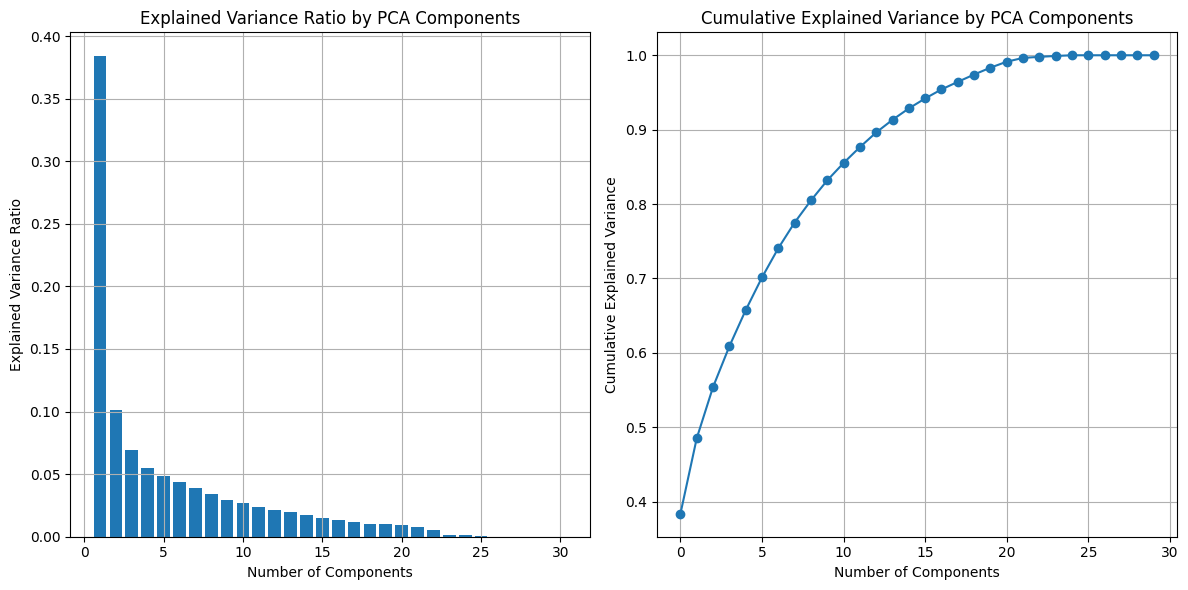

In [39]:
# Creating subplot [1, 2] for the provided plots
plt.figure(figsize=(12, 6))

# First plot: Bar chart for explained variance ratio
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by PCA Components')
plt.grid(True)

# Second plot: Line plot for cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)

# Show the combined plot
plt.tight_layout()
plt.show()


## Step 4: Use PCA for Dimensionality Reduction:

In [40]:
# Applying PCA with 15 components
pca_15 = PCA(n_components=15)
pca_15.fit(preprocessed_data)


# Shape of Preprocessed Data
print("The shape of the preprocessed data before applying PCA:")
print(f"Number of observations: {preprocessed_data.shape[0]}")
print(f"Number of features: {preprocessed_data.shape[1]}")


# Principal Components
print("\n\n====After applying PCA ==== ")
print(f"Shape of PCA components: {pca_15.components_.shape}")

The shape of the preprocessed data before applying PCA:
Number of observations: 2212
Number of features: 30


====After applying PCA ==== 
Shape of PCA components: (15, 30)


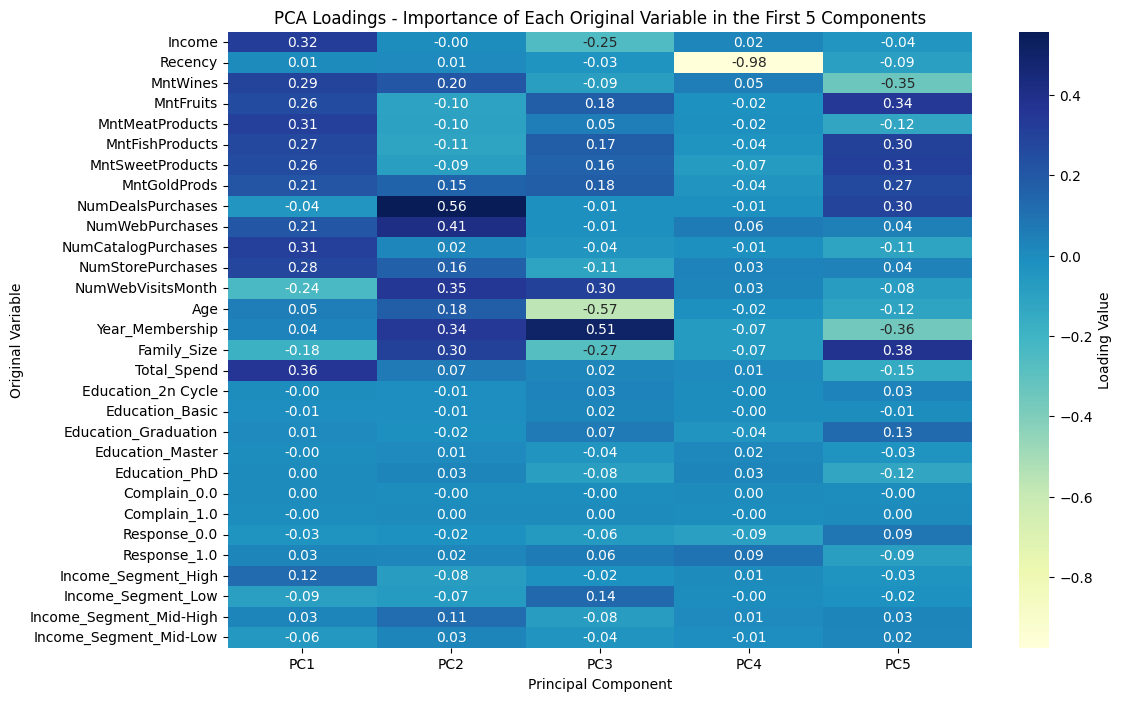

In [41]:
import seaborn as sns

# Visualizing the importance of each original variable in the first few principal components
# We will use a heatmap for this purpose

# Reconstructing the feature names after one-hot encoding
feature_names = numerical_cols.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out().tolist()

# Correctly displaying the PCA loadings with the transformed feature names
pca_loadings_corrected = pd.DataFrame(pca_15.components_, columns=feature_names)

plt.figure(figsize=(12, 8))
sns.heatmap(pca_loadings_corrected.iloc[:5, :].transpose(), 
            cmap='YlGnBu', 
            annot=True, 
            fmt=".2f", 
            cbar_kws={'label': 'Loading Value'},
            xticklabels=[f'PC{i}' for i in range(1,6)])
plt.title('PCA Loadings - Importance of Each Original Variable in the First 5 Components')
plt.xlabel('Principal Component')
plt.ylabel('Original Variable')
plt.yticks(rotation=0)  # To keep the variable names readable
plt.show()


## Step 5: Visualize the Reduced Data:

In [42]:
import pandas as pd

# Transforming the preprocessed data with PCA to reduce its dimensions
reduced_data = pca_15.transform(preprocessed_data)

# Checking the shape of the reduced data
print("Shape of the reduced data:", reduced_data.shape)

# Converting the reduced data to a DataFrame for better readability
reduced_data_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(reduced_data.shape[1])])

# Displaying the first few rows of the reduced data
print("First few rows of the reduced PCA data:")
display(reduced_data_df.head())


Shape of the reduced data: (2212, 15)
First few rows of the reduced PCA data:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,4.374470,0.995051,1.928493,-0.319352,-0.423413,-1.739731,0.578739,0.592181,2.192636,0.450189,-0.068229,0.396630,0.623421,0.123699,0.812692
1,-2.386048,-1.017559,-1.788270,0.310276,0.376215,-0.680188,0.218901,0.495356,0.481116,0.134779,0.078493,-0.148026,0.054838,0.440904,-0.561001
2,1.894442,-0.107539,-0.220239,0.882731,0.197973,-0.493193,-0.880008,-1.136999,-0.427634,-0.210405,-0.336947,0.839139,0.951283,0.653788,-0.287163
3,-2.704721,-1.211831,0.190631,0.795556,0.829349,1.091968,-0.320631,-0.083003,0.186457,0.043862,-0.162471,0.258501,-0.384067,0.630499,0.288222
4,-0.239288,0.275228,-0.643491,-1.421849,1.225065,1.794236,-0.085105,-0.388335,0.779516,-0.499748,-0.288245,-0.055349,0.433003,-0.874921,0.349260


# Clustering with K-Means <span style=' border:1; color:#95E885; text-align:left; font-size:42px;  padding:6px;'>|</span>

### How can we cluster data?
Clustering is a technique used in data mining and machine learning to group similar data points together. There are various algorithms for clustering, but one of the most popular methods is K-means clustering. 

### Why can K-means cluster data?
K-means is one of the most popular clustering algorithms because of its simplicity and efficiency. It works based on the following principles:

### How can we select the number of clusters in K-means?
Selecting the optimal number of clusters, often denoted by "K", is a crucial step in K-means clustering. Several methods can be used for this purpose, with one of the most commonly employed being the Elbow method. In the Elbow method, the within-cluster sum of squares (WCSS) is plotted against the number of clusters. The "elbow point" represents the optimal number of clusters, where adding more clusters does not significantly reduce WCSS.

### Selecting Kmeans's Number of Clusters
Identify Elbow Point: Examine the plot. The point where the rate of decrease of WCSS slows down (forming an "elbow" shape) is often a good indication of the appropriate number of clusters. This is because adding more clusters beyond this point may not significantly reduce the WCSS.

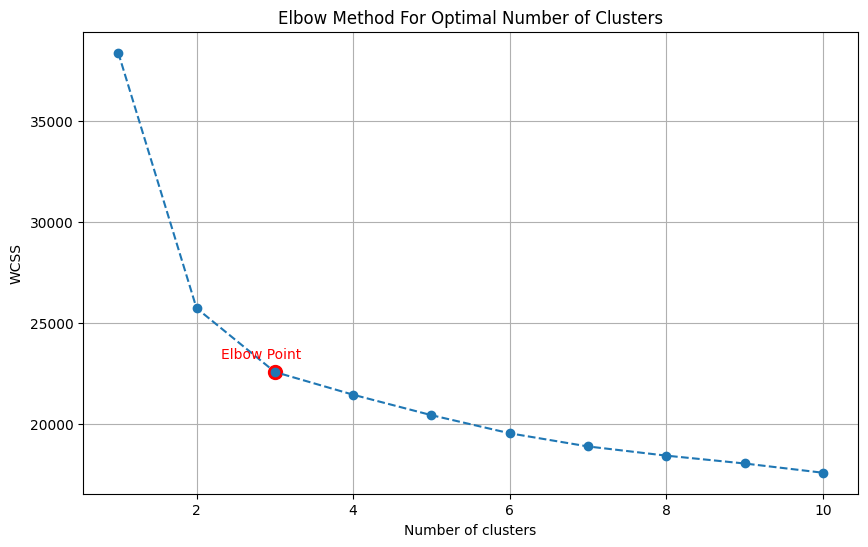

In [43]:
# Calculate WCSS for different number of clusters
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(reduced_data)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'The elbow'
plt.figure(figsize=(10, 6))
lines = plt.plot(range(1, 11), wcss, marker='o', linestyle='--')

# Annotate the 3rd marker
third_marker = lines[0].get_xydata()[2]  # Get the x,y coordinates of the 3rd point
plt.scatter(*third_marker, s=100, color='red')  # Highlight the 3rd marker
plt.annotate('Elbow Point', (third_marker[0], third_marker[1]), textcoords="offset points", xytext=(-10,10), ha='center', color='red')

plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.grid(True)

# Display the plot
plt.show()


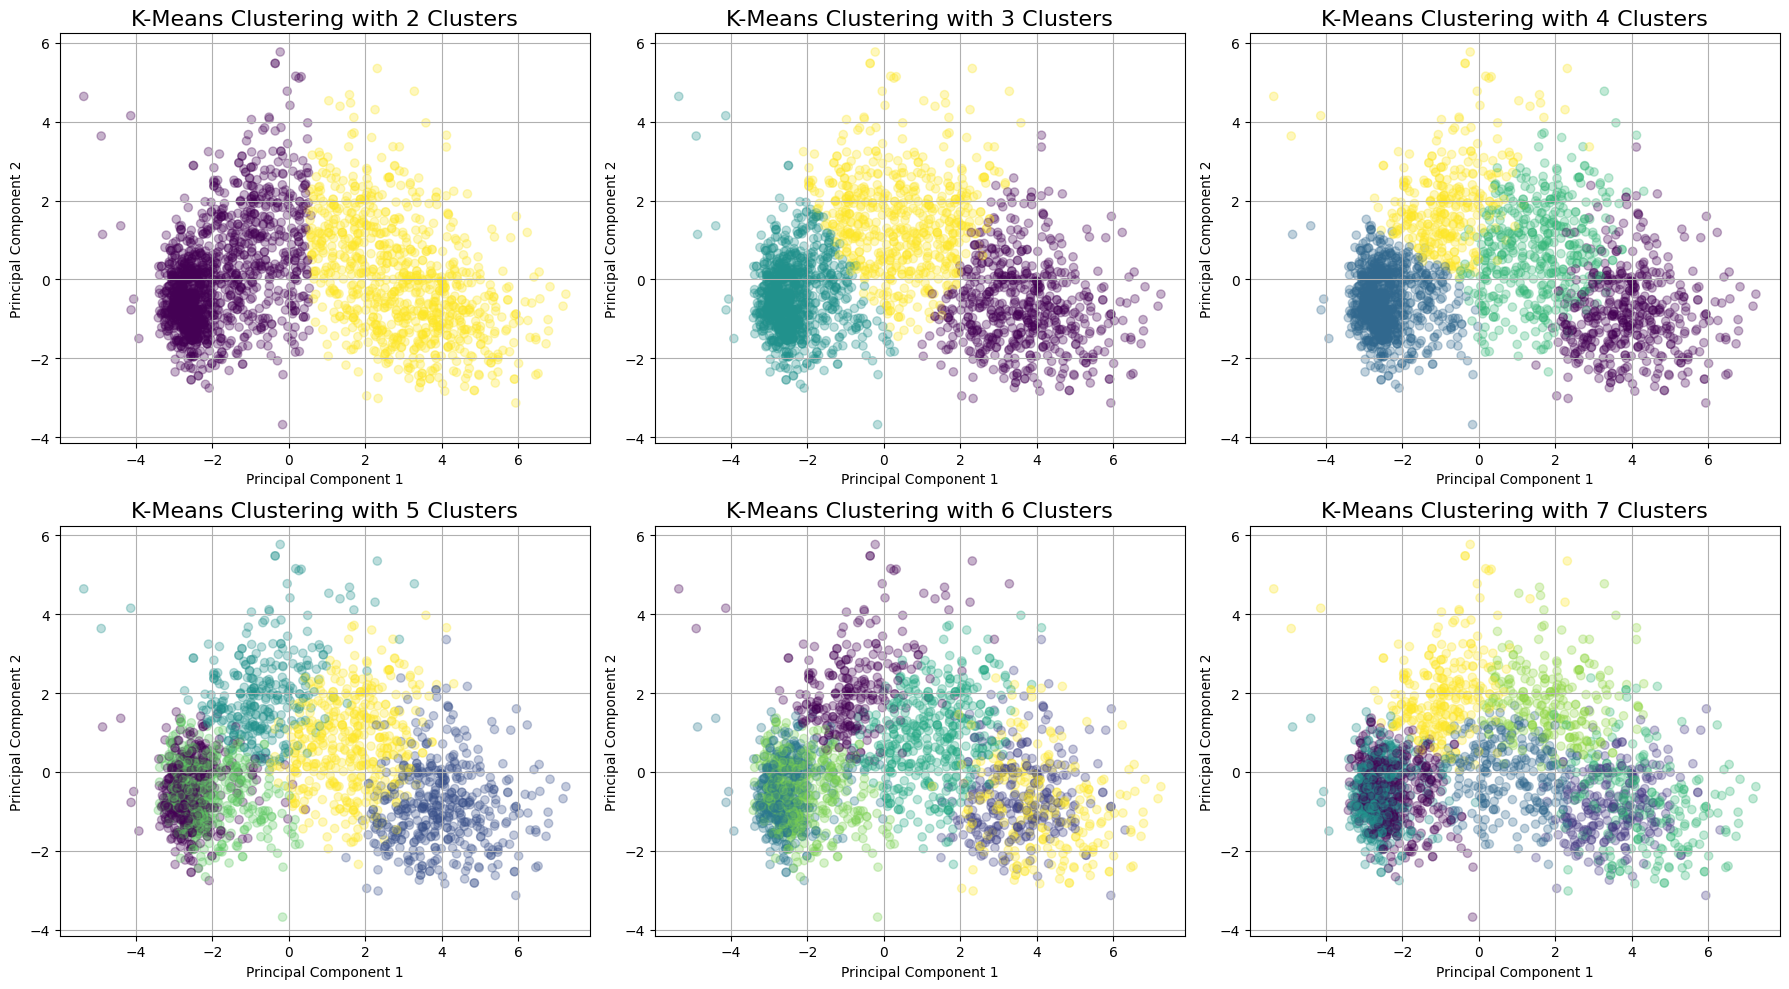

In [44]:
#temp

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'reduced_data' contains your data after dimensionality reduction

# Number of clusters to try
cluster_counts = [2, 3, 4, 5, 6, 7]

n_rows = 2
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))

for i, k in enumerate(cluster_counts):
    row = i // n_cols
    col = i % n_cols

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(reduced_data)

    # Scatter plot using the first two principal components
    axes[row, col].scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.3)
    axes[row, col].set_title(f'K-Means Clustering with {k} Clusters', size=16)
    axes[row, col].set_xlabel('Principal Component 1')
    axes[row, col].set_ylabel('Principal Component 2')
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()



> The analysis of the K-Means clustering plots for 𝑘 k values ranging from 2 to 7 suggests that **k=3** is the most suitable choice for clustering this data, the clusters are distinct, well-separated, and each captures a dense group of data points, providing a clear and meaningful partition of the dataset. Increasing the number of clusters beyond three leads to overlaps and potentially over-segmentation

## Apply the chosen number of clusters

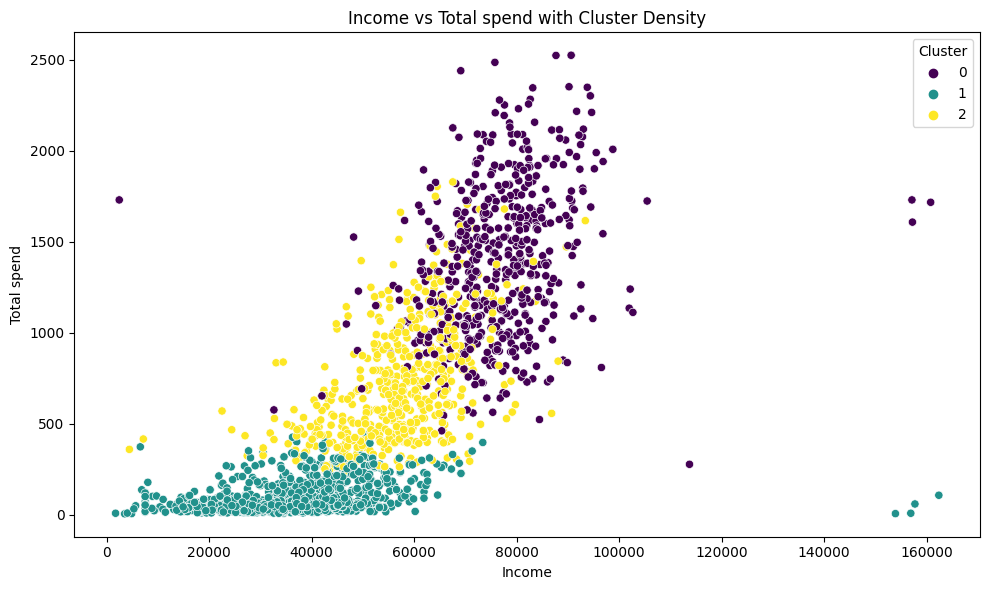

In [45]:
# Assigninge color palette
palette = 'viridis'

# Assigning cluster labels
kmeans_3_clusters = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans_3_clusters.fit_predict(reduced_data)
data_new['Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))

# Using seaborn's scatter plot with a KDE overlay for each cluster
sns.scatterplot(data=data_new, x='Income', y='Total_Spend', hue='Cluster', palette=palette, alpha=1)
#     sns.kdeplot(data=data_new, x='Income', y=col, hue='Cluster', palette=palette, alpha=.9, linewidths=1)
plt.title(f'Income vs Total spend with Cluster Density')
plt.xlabel('Income')
plt.ylabel('Total spend')

plt.tight_layout()
plt.show()

# Summary <span style=' border:1; color:#95E885; text-align:left; font-size:42px;  padding:6px;'>|</span>

## Key observations from the clustering results:

1. **Cluster Characteristics**:
   - **<p style="color: purple;">Cluster 0 (Purple)</p>**: Represents customers with a wide range of incomes but generally lower total spending. This is the largest cluster and suggests a group of customers who are conservative spenders across different income levels.
   - **<p style="color: teal;">Cluster 1 (Teal)</p>**: Encompasses customers with moderate incomes and moderate to high total spending. This cluster is tightly packed, indicating a strong correlation between income and spending for this group.
   - **<p style="color: gold;">Cluster 2 (Yellow)</p>**: Contains customers with high incomes and high total spending. It appears to be smaller and more spread out than the other two clusters, suggesting these are premium customers who vary more in their spending despite high incomes.


<br>

2. **Income vs. Spend Correlation**:
   - There is a positive correlation between income and total spend, which is most apparent in clusters 1 and 2. As income increases, total spend also tends to increase.

# SWOT Analysis and Next Steps <span style=' border:1; color:#95E885; text-align:left; font-size:42px;  padding:6px;'>|</span>


#### <p style="color: purple;">Cluster 0 (Purple): Conservative Spenders</p>
| **Category** | **Description** |
|:--------------|:-----------------|
| **Strengths** | Large customer base, stable revenue, less impacted by economic changes. |
| **Weaknesses** | Low revenue per customer, limited growth. |
| **Opportunities** | Upsell services, create loyalty programs to boost spending. |
| **Threats** | Price sensitive, risk of losing to cheaper options. |
| **Next Steps** | Offer affordable products, improve rewards in loyalty programs. |

#### <p style="color: teal;">Cluster 1 (Teal): Middle Income, Moderate to High Spenders</p>
| **Category** | **Description** |
|:--------------|:-----------------|
| **Strengths** | Regular spending, responds well to value-focused marketing. |
| **Weaknesses** | Limited extra money for luxuries, faces lots of competition. |
| **Opportunities** | Introduce varied product levels, use targeted marketing. |
| **Threats** | Vulnerable to economic downturns, could lose customers to different brands. |
| **Next Steps** | Use data to customize products and ads, offer bundled products. |

#### <p style="color: gold;">Cluster 2 (Yellow): High Income, High Spenders</p>
| **Category** | **Description** |
|:--------------|:-----------------|
| **Strengths** | More profitable, likes high-end products. |
| **Weaknesses** | Fewer customers, expects high quality. |
| **Opportunities** | Sell unique, high-quality items, provide personalized service. |
| **Threats** | Spending may drop during economic hardship, faces strong competition. |
| **Next Steps** | Focus on high-end products and services, enhance personalized shopping experiences. |
